#### Using the Titanic dataset, clean up the data (handle missing values either by removal or filling, and transforming non-numerical data into number values) and then build Gaussian and Bernoulli Naive Bayes models to predict Titanic passengers' survival status (1=survived, 0=did not survive).

#### Compare the two models against each other. Did one model perform better than the other? How does the performance of these two models compare to the other classification algorithms, logistic regression and decision trees?

#### For a bonus challenge, try different methods of preparing your data (cleaning, choosing rows/columns) to see if that affects your results.

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_excel('titanic-1.xls')

df.head() #first 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [3]:
df["family size"] = df["sibsp"] + df["parch"] +1
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [4]:
df.drop(columns =['cabin','body','home.dest','ticket','embarked'],inplace=True)
df

,pclass,survived,name,sex,age,sibsp,parch,fare,boat,family size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,211.3375,2,1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,151.5500,11,4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,151.5500,NaN,4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,151.5500,NaN,4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,151.5500,NaN,4
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,14.4542,NaN,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,14.4542,NaN,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,7.2250,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,7.2250,NaN,1


In [5]:
#descriptive statistics
df.describe()

,pclass,survived,age,sibsp,parch,fare,family size
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,1309.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,1.883881
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,1.583639
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,1.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,2.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,11.000000


In [6]:
df.shape

(1309, 10)

In [7]:
df.isnull().sum()

pclass           0
survived         0
name             0
sex              0
age            263
sibsp            0
parch            0
fare             1
boat           823
family size      0
dtype: int64

In [8]:
df.dropna(inplace=True)


In [9]:
df.shape

(417, 10)

## Naïve Bayes using Scikit-Learn

### Gaussian Naïve Bayes

In [10]:
from sklearn.naive_bayes import GaussianNB  #import Gaussian Bayes modeling function
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [11]:
#check to see if there are any missing values
df.count()

pclass         417
survived       417
name           417
sex            417
age            417
sibsp          417
parch          417
fare           417
boat           417
family size    417
dtype: int64

In [12]:
df.dtypes

pclass           int64
survived         int64
name            object
sex             object
age            float64
sibsp            int64
parch            int64
fare           float64
boat            object
family size      int64
dtype: object

In [13]:
#create a dataframe with columns to use in the model
modeldf = df[['survived', 'age', 'pclass', 'fare', 'sex','family size']]
modeldf.head()

,survived,age,pclass,fare,sex,family size
0,1,29.0000,1,211.3375,female,1
1,1,0.9167,1,151.5500,male,4
5,1,48.0000,1,26.5500,male,1
6,1,63.0000,1,77.9583,female,2
8,1,53.0000,1,51.4792,female,3


In [14]:
#transform gender column to binary values (0,1)
modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})
modeldf.head()

C:\Users\RVHU32~1\AppData\Local\Temp/ipykernel_8344/1973191407.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  modeldf['sex'] = modeldf['sex'].map({'female': 0, 'male': 1})


,survived,age,pclass,fare,sex,family size
0,1,29.0000,1,211.3375,0,1
1,1,0.9167,1,151.5500,1,4
5,1,48.0000,1,26.5500,1,1
6,1,63.0000,1,77.9583,0,2
8,1,53.0000,1,51.4792,0,3


In [15]:
#see which features are correlated to each other
modeldf.corr()

,survived,age,pclass,fare,sex,family size
survived,1.000000,-0.021620,-0.107205,0.054773,-0.143353,0.034564
age,-0.021620,1.000000,-0.441205,0.210958,-0.083788,-0.214458
pclass,-0.107205,-0.441205,1.000000,-0.538258,0.160288,-0.019183
fare,0.054773,0.210958,-0.538258,1.000000,-0.144660,0.171251
sex,-0.143353,-0.083788,0.160288,-0.144660,1.000000,-0.150072
family size,0.034564,-0.214458,-0.019183,0.171251,-0.150072,1.000000


##### survived = passenger survival; 1 = survived, 0 = did not survive


In [16]:
#dataframe with predicting features
X = modeldf.drop('survived', axis=1)

#column of predictive target values
y = modeldf['survived']

In [17]:
#create training and test data
#will leave test size at default (25%)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=109)

In [18]:
#initialize Gaussian Bayes classifier
gnb = GaussianNB()

In [19]:
#train the model to learn trends
gnb.fit(X_train, y_train)

GaussianNB()

In [20]:
#predictive score of the model on the training data
gnb.score(X_train, y_train)

0.9551282051282052

In [21]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [22]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survive'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survive
True Died,1,0
True Survived,4,100


In [23]:
#frequency of passed students to failed students in the test dataset
y_test.value_counts()

1    104
0      1
Name: survived, dtype: int64

In [24]:
df['survived'].value_counts()

1    410
0      7
Name: survived, dtype: int64

In [25]:
#predictive score of the model on the test data
gnb.score(X_test, y_test)

0.9619047619047619

In [26]:
#predictive score of the model for each predictive category
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.20      1.00      0.33         1
           1       1.00      0.96      0.98       104

    accuracy                           0.96       105
   macro avg       0.60      0.98      0.66       105
weighted avg       0.99      0.96      0.97       105



### Bernoulli's Naïve Bayes

In [27]:
#import Bernoulli Naïve Bayes function from scikit-learn library
from sklearn.naive_bayes import BernoulliNB

In [28]:
#initialize Bernoulli Naïve Bayes function to a variable
bnb = BernoulliNB()

In [29]:
#build the model with training data
bnb.fit(X_train, y_train)

BernoulliNB()

In [30]:
#model's predictive score on the training data
bnb.score(X_train, y_train)

0.9807692307692307

In [31]:
#test the model on unseen data
#score predictive values in variable
y_pred = gnb.predict(X_test)

In [32]:
#Confusion matrix shows which values model predicted correctly vs incorrectly

cm = pd.DataFrame(
    confusion_matrix(y_test, y_pred),
    columns=['Predicted Died', 'Predicted Survived'],
    index=['True Died', 'True Survived']
)

cm

,Predicted Died,Predicted Survived
True Died,1,0
True Survived,4,100


In [33]:
#predictive score of the model on the test data
bnb.score(X_test, y_test)

0.9904761904761905

The 2 models give same prediction for this dataset. Bernoulli's Naïve Bayes gives 99% score of accuracy at the end, so based on accuracy score, we could use Bernoulli's Naïve Bayes over Gaussian Naïve Bayes.

# K-Means Clustering

In [34]:
from sklearn.cluster import KMeans

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt

%matplotlib inline

In [35]:
df = pd.read_excel('titanic-1.xls')

df.head() #first 5 rows

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [36]:
df["family size"] = df["sibsp"] + df["parch"] +1
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,family size
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",4
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",4
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN,2
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN,2
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN,1
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN,1


In [37]:
#df.drop(columns =['cabin','body','home.dest','ticket','embarked'],inplace=True)
df.drop(columns =['cabin','body','home.dest','ticket','embarked','sibsp','parch','pclass','boat'],inplace=True)
df

,survived,name,sex,age,fare,family size
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,1
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,4
2,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,4
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,4
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,4
...,...,...,...,...,...,...
1304,0,"Zabour, Miss. Hileni",female,14.5000,14.4542,2
1305,0,"Zabour, Miss. Thamine",female,NaN,14.4542,2
1306,0,"Zakarian, Mr. Mapriededer",male,26.5000,7.2250,1
1307,0,"Zakarian, Mr. Ortin",male,27.0000,7.2250,1


In [38]:
df.isnull().sum()

survived         0
name             0
sex              0
age            263
fare             1
family size      0
dtype: int64

In [39]:
df.shape

(1309, 6)

In [40]:
df.dropna(axis=0,inplace=True)

In [41]:
df.shape

(1045, 6)

In [42]:
df.describe()

,survived,age,fare,family size
count,1045.000000,1045.000000,1045.000000,1045.000000
mean,0.408612,29.851834,36.686080,1.924402
std,0.491813,14.389201,55.732533,1.453305
min,0.000000,0.166700,0.000000,1.000000
25%,0.000000,21.000000,8.050000,1.000000
50%,0.000000,28.000000,15.750000,1.000000
75%,1.000000,39.000000,35.500000,2.000000
max,1.000000,80.000000,512.329200,11.000000


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='count'>

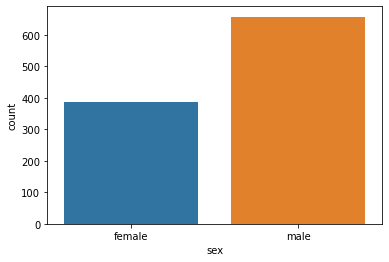

In [43]:
# number of customers by gender
sns.countplot(df['sex'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

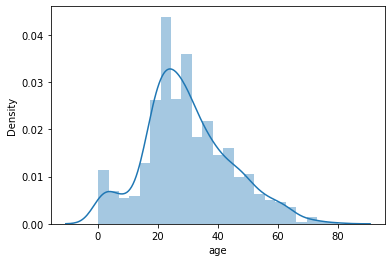

In [44]:
# distribution of customer age
sns.distplot(df['age'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='family size', ylabel='Density'>

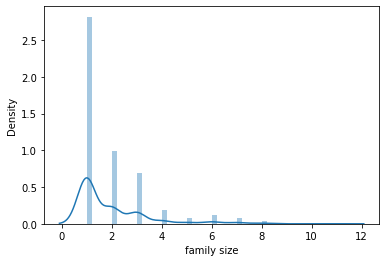

In [45]:
# distribution of customer age
sns.distplot(df['family size'])

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='fare', ylabel='Density'>

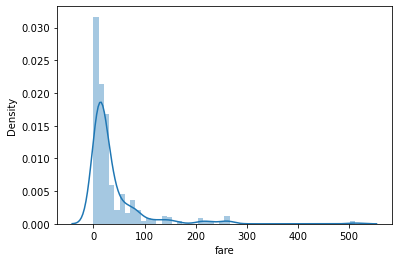

In [46]:

# distribution of customer age
sns.distplot(df['fare'])

In [47]:
# mean average spending by gender
pd.pivot_table(data=df, index='survived', values='age')

,age
survived,
0,30.496899
1,28.918228


In [48]:
# mean average spending by gender
pd.pivot_table(data=df, index='survived', values='fare')

,fare
survived,
0,25.148752
1,53.384134


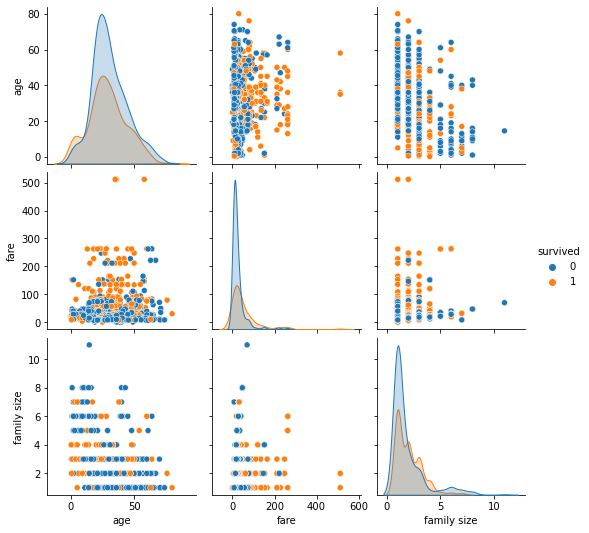

In [49]:
# compare all numerical features by income group
sns.pairplot(data=df, hue="survived")

### Insight
From this visualization, we can estimate that people who pay fare less than $100 are most likely to die than people who pay more fare. From this information, let's examine the average age of people who pay less than 100 and more than 100 ( relationship between age and fare), so we can estimate the age of people who survive and not.

# K-Means Model

In [50]:
# dataframe that will be used in algorithm
X = df[['age', 'fare']]
X.head()

,age,fare
0,29.0000,211.3375
1,0.9167,151.5500
2,2.0000,151.5500
3,30.0000,151.5500
4,25.0000,151.5500


In [51]:
# initialize KMeans to create 2 clusters
kmeans = KMeans(n_clusters=5)

In [52]:
# build the model
# determine centroid position, then assign data to groups based on closest centroid
kmeans.fit(X)

KMeans(n_clusters=5)

In [53]:
len(df)

1045

In [54]:
# centroid row position DOES NOT MATTER
# centroid columns are in order of dataframe columns index(0=Age, 1=Income, 2=Score)
kmeans.cluster_centers_

array([[ 27.95699257,  15.50205668],
       [ 33.88178372, 133.55552093],
       [ 37.046875  , 238.60859375],
       [ 41.        , 512.3292    ],
       [ 36.7056962 ,  65.71906899]])

In [55]:
# create column in original dataframe with cluster group number
df['cluster'] = kmeans.labels_
df.head()

,survived,name,sex,age,fare,family size,cluster
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000,211.3375,1,2
1,1,"Allison, Master. Hudson Trevor",male,0.9167,151.5500,4,1
2,0,"Allison, Miss. Helen Loraine",female,2.0000,151.5500,4,1
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,151.5500,4,1
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,151.5500,4,1


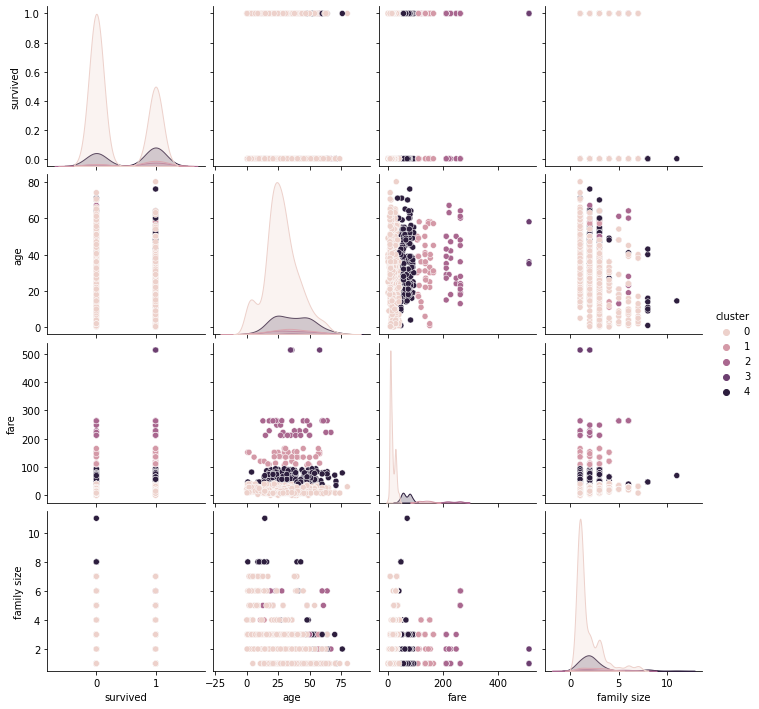

In [58]:
# compare all numerical features by cluster group
sns.pairplot(data=df, hue='cluster')

## Cluster Analysis

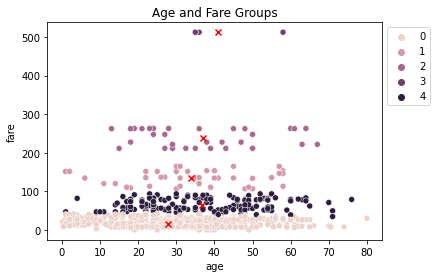

In [59]:
# compare "Income" and "Score"
sns.scatterplot(data=df, x='age', y='fare', hue='cluster')

# scatterplot of centroid coordinates for income and spending score
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', marker='x')

plt.title("Age and Fare Groups")
#put the legend on the right
plt.legend(bbox_to_anchor=(1,1), loc=2)

In [60]:
# select a cluster from dataframe
cluster = df.loc[df['cluster'] == 0]
cluster.head()

,survived,name,sex,age,fare,family size,cluster
5,1,"Anderson, Mr. Harry",male,48.0,26.55,1,0
7,0,"Andrews, Mr. Thomas Jr",male,39.0,0.00,1,0
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0,30.00,1,0
22,1,"Behr, Mr. Karl Howell",male,26.0,30.00,1,0
25,0,"Birnbaum, Mr. Jakob",male,25.0,26.00,1,0


In [61]:
# number of customers in this cluster
len(cluster)

808

In [62]:
# descriptive statistics for this cluster
cluster.describe()

,survived,age,fare,family size,cluster
count,808.000000,808.000000,808.000000,808.000000,808.0
mean,0.342822,27.956993,15.502057,1.782178,0.0
std,0.474947,13.565453,9.160772,1.356824,0.0
min,0.000000,0.166700,0.000000,1.000000,0.0
25%,0.000000,20.000000,7.895800,1.000000,0.0
50%,0.000000,27.000000,12.693750,1.000000,0.0
75%,1.000000,35.000000,23.250000,2.000000,0.0
max,1.000000,80.000000,41.579200,7.000000,0.0


### Analyze income range of clusters

In [63]:
# sort the cluster numbers from min(0) to max(4)
sorted_clusters = sorted(df['cluster'].unique())

# select the rows of the same cluster number
# then get min/max income and average spending score
print("Cluster Income Ranges\n")
for cluster_num in sorted_clusters:
    small_df = df.loc[df['cluster'] == cluster_num]
    min_fare = small_df['fare'].min()
    max_fare = small_df['fare'].max()
    avg_age = small_df['age'].mean()
    
    print(f"Cluster {cluster_num}: ${min_fare:.2f}-${max_fare:.2f}, avg age: {int(avg_age)}")

Cluster Income Ranges

Cluster 0: $0.00-$41.58, avg age: 27
Cluster 1: $106.42-$164.87, avg age: 33
Cluster 2: $211.34-$263.00, avg age: 37
Cluster 3: $512.33-$512.33, avg age: 41
Cluster 4: $34.65-$93.50, avg age: 36


### Customer Segments

After analyzing the fare ranges and average age of each clusters, we identified these groups of people's fares:

- lower fare, average age
- low fare, younger age
- high fare, average age
- highest fare, older age
- average fare, average age

This information can be used to classify the pattern of people survived based on their ages. If they pay more than $100, they are most likely survive.

In [64]:
# new customer with Age=32, fair= $300
person = [32, 300]

group = kmeans.predict([person])

print(f"Cluster assignment: {group}")

Cluster assignment: [2]


## Conclusions

This customer is assigned to the group of people that pay high fare, can be seen as survive on the visualization. This explains well as people who pay more fare are richer and are most likely on first class, they would be priotized to get boat first compares to poor people who pay less fare and get basement spots.